In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seed & synthetic dataset
np.random.seed(42)
n = 1000

dates = pd.date_range('2022-01-01', '2024-12-31', periods=n)
product_categories = ['Machinery', 'Tools', 'Electrical', 'Automotive']
regions = ['North', 'South', 'East', 'West']
customer_types = ['Corporate', 'Distributor', 'Retail']
sales_channels = ['Online', 'Offline']

#dataset
data = {
    'Order_ID': np.arange(1001, 1001 + n),
    'Date': np.random.choice(dates, n),
    'Product_Category': np.random.choice(product_categories, n),
    'Product_Name': np.random.choice([
        'Pump', 'Compressor', 'Welding Machine', 'Conveyor Belt',
        'Drill', 'Motor', 'Valve', 'Gearbox'
    ], n),
    'Region': np.random.choice(regions, n),
    'Customer_Type': np.random.choice(customer_types, n),
    'Units_Sold': np.random.randint(10, 200, n),
    'Unit_Price': np.random.randint(500, 5000, n),
    'Discount': np.round(np.random.uniform(0, 0.25, n), 2),
    'Sales_Channel': np.random.choice(sales_channels, n)
}

df = pd.DataFrame(data)
df['Total_Sales'] = (df['Units_Sold'] * df['Unit_Price'] * (1 - df['Discount'])).round(2)
df['Profit'] = (df['Total_Sales'] * np.random.uniform(0.10, 0.30, n)).round(2)
df.head()


,Order_ID,Date,Product_Category,Product_Name,Region,Customer_Type,Units_Sold,Unit_Price,Discount,Sales_Channel,Total_Sales,Profit
0,1001,2022-04-22 19:14:35.675675676,Machinery,Compressor,East,Distributor,33,1454,0.12,Offline,42224.16,10297.53
1,1002,2023-04-22 19:14:35.675675672,Machinery,Gearbox,East,Corporate,11,2933,0.15,Online,27423.55,2896.59
2,1003,2024-07-31 15:25:24.324324320,Electrical,Valve,East,Retail,90,2129,0.15,Online,162868.50,28512.45
3,1004,2022-10-23 22:42:09.729729728,Automotive,Pump,West,Retail,109,3281,0.10,Offline,321866.10,72532.74
4,1005,2022-04-27 04:28:06.486486486,Machinery,Valve,East,Distributor,151,1149,0.08,Online,159619.08,20625.87


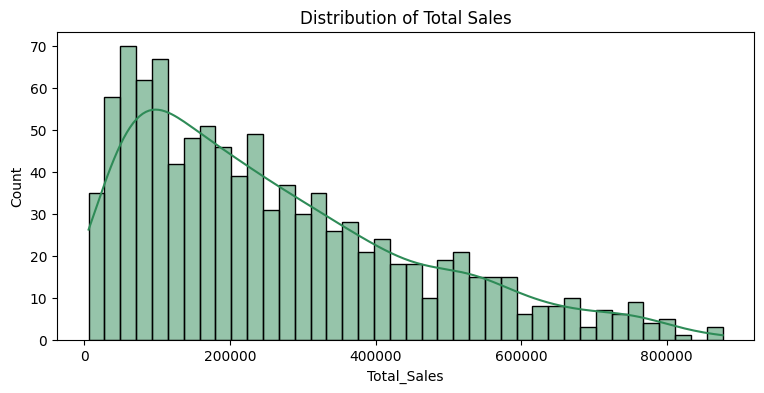

In [85]:

#Univariate Analysis
#total sales
plt.figure(figsize=(9,4))
sns.histplot(df['Total_Sales'], bins=40, kde=True, color='seagreen')
plt.title('Distribution of Total Sales')
plt.show()






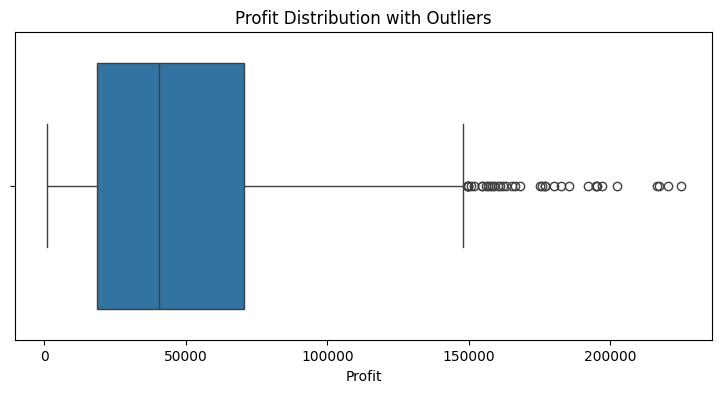

In [86]:
#profit distribution
plt.figure(figsize=(9,4))
sns.boxplot(x=df['Profit'])
plt.title('Profit Distribution with Outliers')
plt.show()

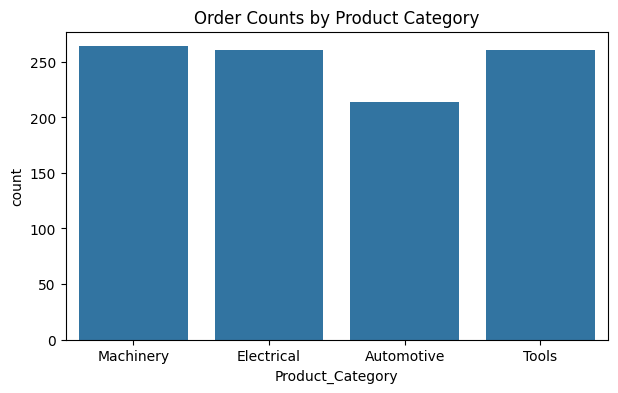

In [87]:
#sales of product category
plt.figure(figsize=(7,4))
sns.countplot(x='Product_Category', data=df)
plt.title('Order Counts by Product Category')
plt.show()

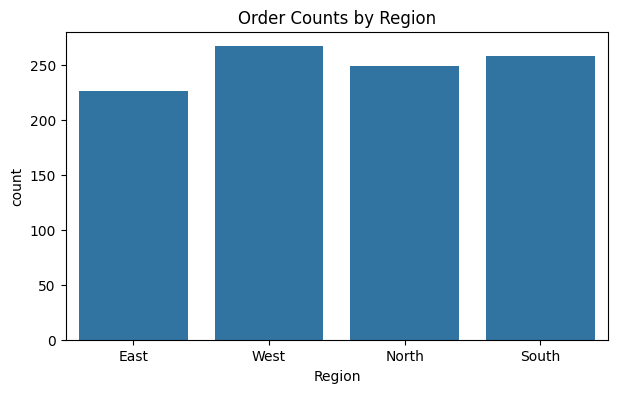

In [88]:
#region
plt.figure(figsize=(7,4))
sns.countplot(x='Region', data=df)
plt.title('Order Counts by Region')
plt.show()

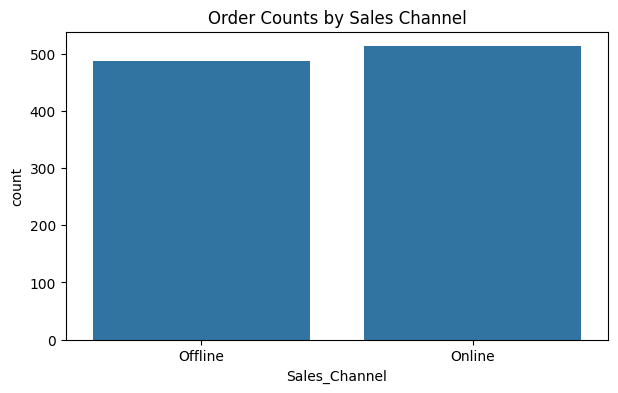

In [89]:
#sales channel
plt.figure(figsize=(7,4))
sns.countplot(x='Sales_Channel', data=df)
plt.title('Order Counts by Sales Channel')
plt.show()

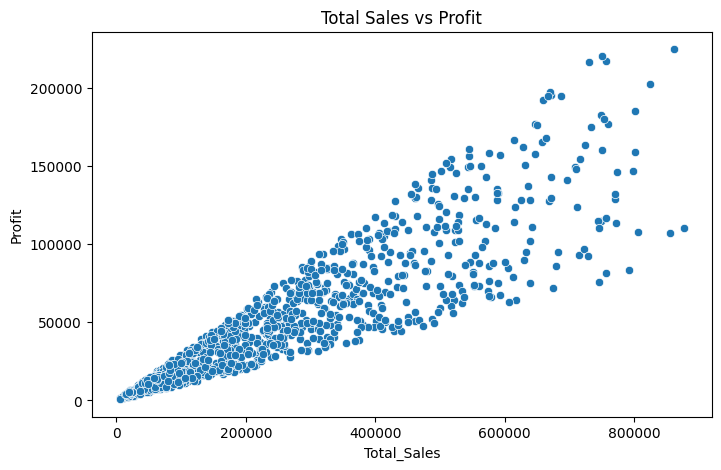

In [90]:
# Bivariate Analysis
#total sales vs profit
plt.figure(figsize=(8,5))
sns.scatterplot(x='Total_Sales', y='Profit', data=df)
plt.title('Total Sales vs Profit')
plt.show()

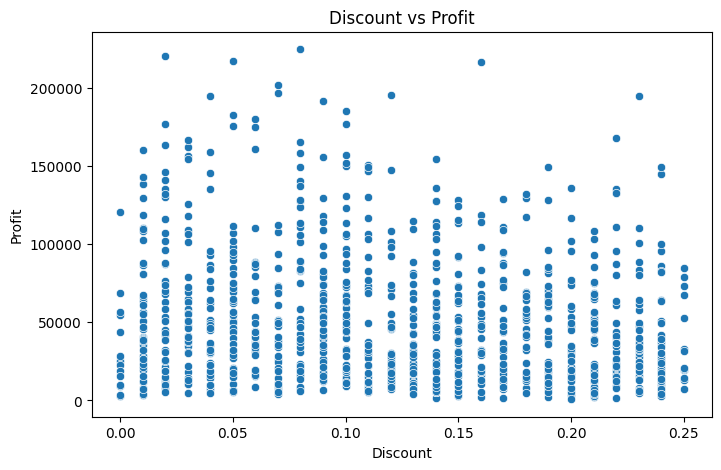

In [91]:
#discount vs profit
plt.figure(figsize=(8,5))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Discount vs Profit')
plt.show()

/tmp/ipython-input-374468504.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_Category', y='Profit', data=df, palette='pastel',estimator=np.mean)


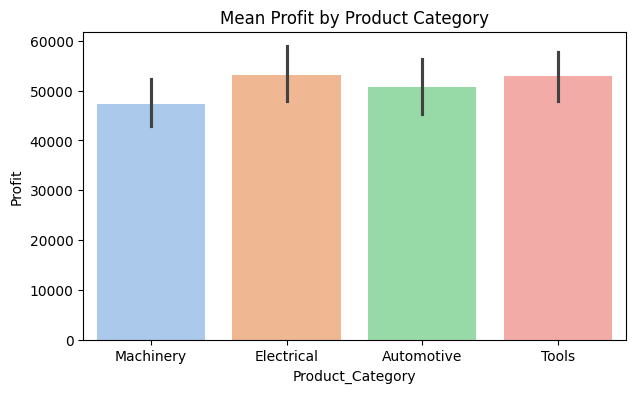

In [92]:
#avg profit
plt.figure(figsize=(7,4))
sns.barplot(x='Product_Category', y='Profit', data=df, palette='pastel',estimator=np.mean)
plt.title('Mean Profit by Product Category')
plt.show()

/tmp/ipython-input-1817462894.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Total_Sales', data=df, palette='pastel',estimator=np.mean)


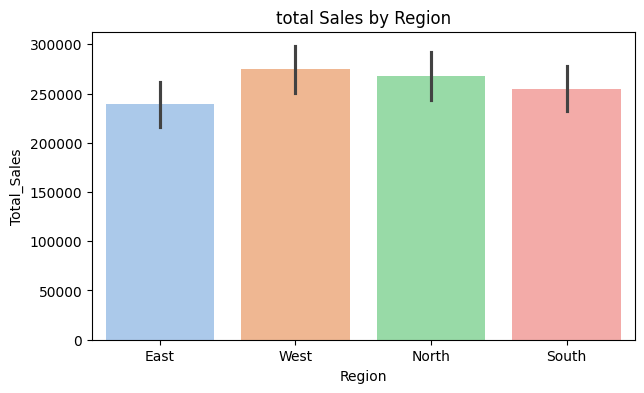

In [93]:
#total sales by region
plt.figure(figsize=(7,4))
sns.barplot(x='Region', y='Total_Sales', data=df, palette='pastel',estimator=np.mean)
plt.title('total Sales by Region')
plt.show()

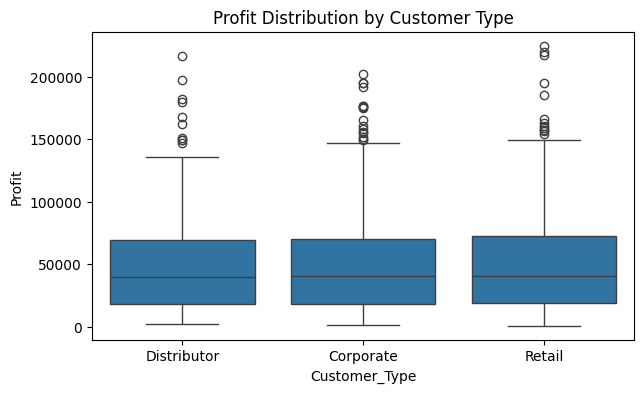

In [94]:
#profit by customer
plt.figure(figsize=(7,4))
sns.boxplot(x='Customer_Type', y='Profit', data=df)
plt.title('Profit Distribution by Customer Type')
plt.show()

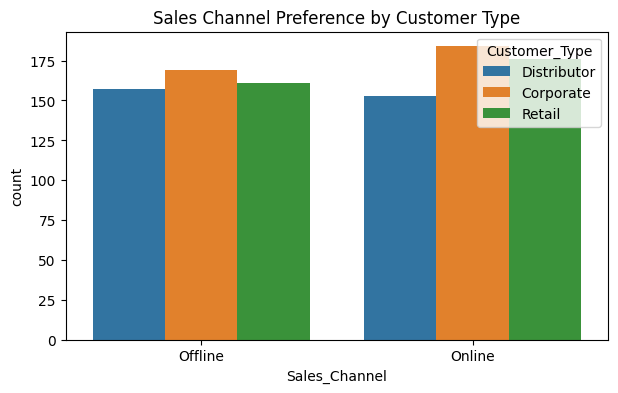

In [95]:
plt.figure(figsize=(7,4))
sns.countplot(x='Sales_Channel', hue='Customer_Type', data=df)
plt.title('Sales Channel Preference by Customer Type')
plt.show()

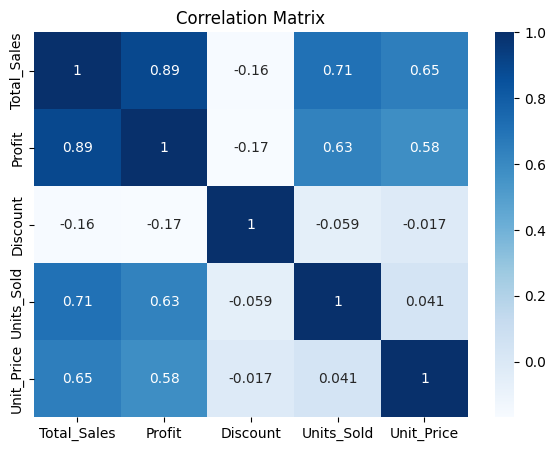

In [96]:
#Correlation Matrix
corr = df[['Total_Sales', 'Profit', 'Discount', 'Units_Sold', 'Unit_Price']].corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

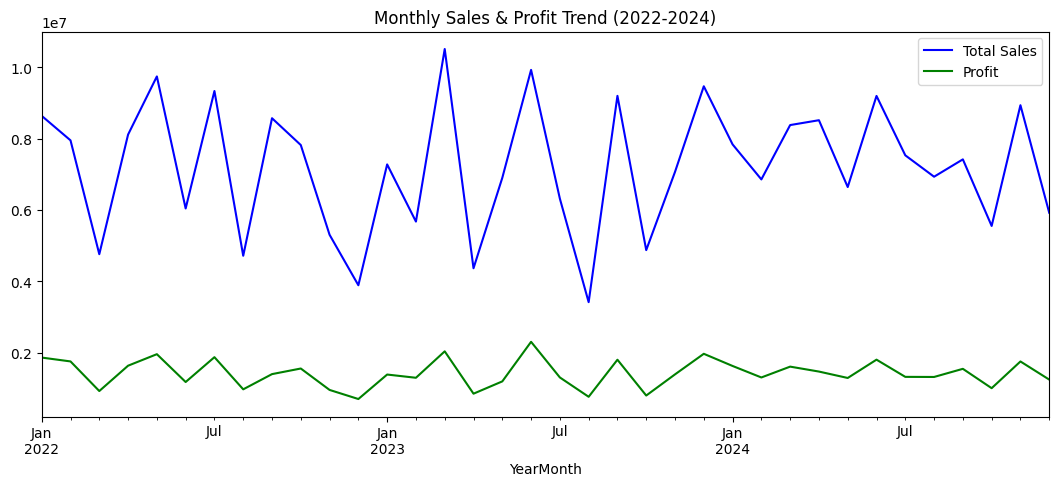

In [97]:
#Trend Analysis
df['YearMonth'] = pd.to_datetime(df['Date']).dt.to_period('M')
sales_trend = df.groupby('YearMonth')['Total_Sales'].sum()
profit_trend = df.groupby('YearMonth')['Profit'].sum()

plt.figure(figsize=(13,5))
sales_trend.plot(label='Total Sales', color='b')
profit_trend.plot(label='Profit', color='g')
plt.title('Monthly Sales & Profit Trend (2022-2024)')
plt.legend()
plt.show()

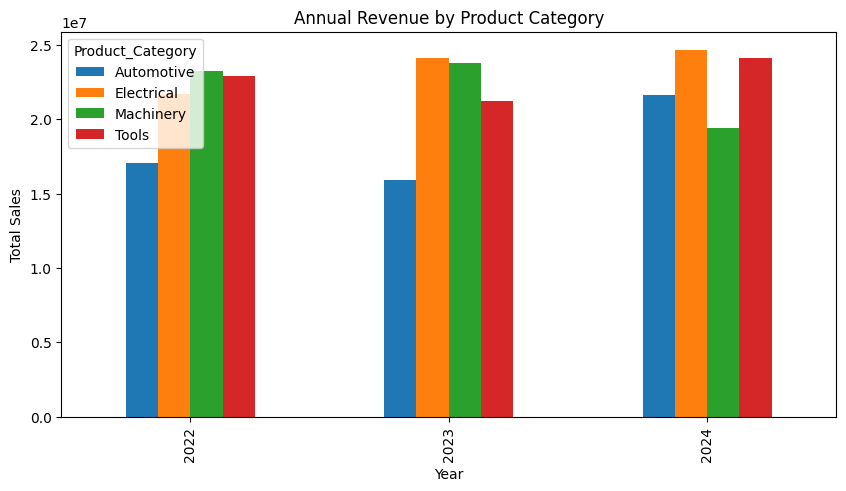

In [98]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
cat_trend = df.groupby(['Year', 'Product_Category'])['Total_Sales'].sum().unstack()
cat_trend.plot(kind='bar', figsize=(10,5))
plt.title('Annual Revenue by Product Category')
plt.ylabel('Total Sales')
plt.show()

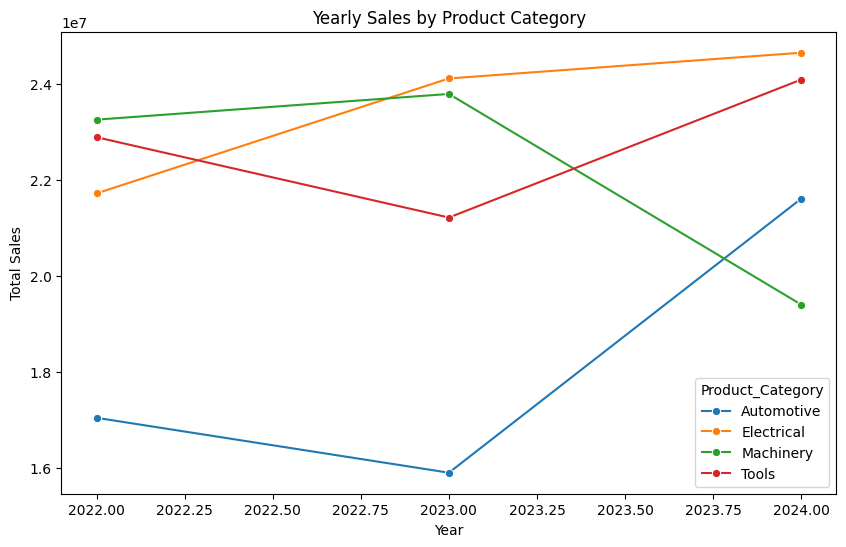

In [99]:
category_sales = df.groupby(['Year', 'Product_Category'])['Total_Sales'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Total_Sales', hue='Product_Category', data=category_sales, marker='o')
plt.title("Yearly Sales by Product Category")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()